<a href="https://colab.research.google.com/github/saketh105/Data690/blob/main/assignment5/part03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

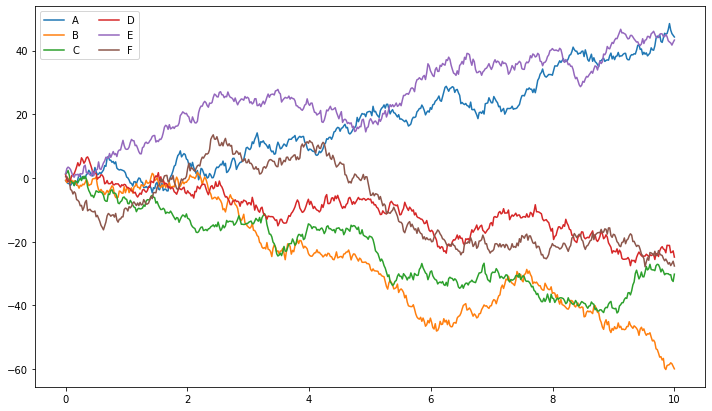

In [3]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [4]:
import requests
import pandas as pd

In [5]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [6]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-10-07 00:12:46.227837')

In [7]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [8]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [9]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-10-07 01:00:00,19960,20048,19947,20000,55.114072,1.102959e+06
2022-10-07 02:00:00,19993,20023,19969,19998,7.172439,1.434777e+05
2022-10-07 03:00:00,20003,20053,19972,20021,6.397536,1.281079e+05
2022-10-07 04:00:00,20026,20031,19982,19987,5.088752,1.018347e+05
2022-10-07 05:00:00,19988,20014,19944,19947,9.855283,1.970103e+05


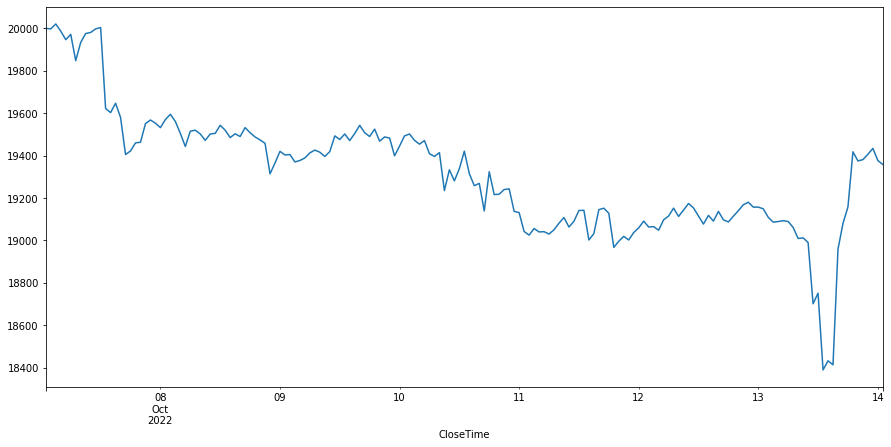

In [10]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [11]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-10-07 01:00:00,1352.1,1361.8,1350.6,1355.9,527.581844,716047.061113
2022-10-07 02:00:00,1355.8,1359.4,1354.2,1355.2,245.485883,333119.819965
2022-10-07 03:00:00,1355.7,1359.9,1351.0,1356.7,221.058930,299630.910608
2022-10-07 04:00:00,1356.5,1358.5,1354.8,1355.6,239.628916,325019.275834
2022-10-07 05:00:00,1355.7,1359.5,1352.6,1352.6,317.827605,431247.634106


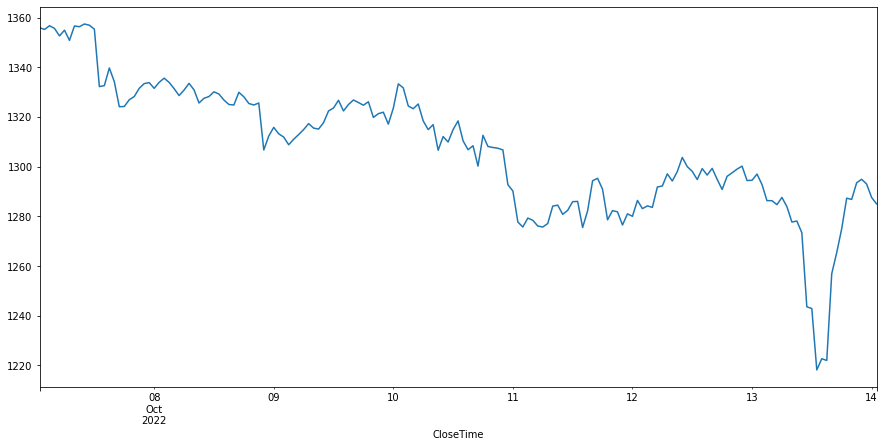

In [12]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [13]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-10-07 01:00:00,1352.1,1361.8,1350.6,1355.9,527.581844,716047.061113
2022-10-07 02:00:00,1355.8,1359.4,1354.2,1355.2,245.485883,333119.819965
2022-10-07 03:00:00,1355.7,1359.9,1351.0,1356.7,221.058930,299630.910608
2022-10-07 04:00:00,1356.5,1358.5,1354.8,1355.6,239.628916,325019.275834
2022-10-07 05:00:00,1355.7,1359.5,1352.6,1352.6,317.827605,431247.634106


In [14]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [15]:
output_notebook()

In [16]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [17]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [18]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [19]:
eth.to_excel(writer, sheet_name='Ether')

In [20]:
writer.save()